<a href="https://colab.research.google.com/github/itsmedragons/asteroids/blob/main/k_means_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DO NOT WORK DIRECTLY IN THIS WORKBOOK - MAKE A COPY


In [ ]:
# Import Libraries needed for k_means clustering
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from google.colab import files

In [ ]:
# Upload your file to Google Collab

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("File successfuly uploaded and read into the dataframe")

df.describe()

Saving Jeremys 55+.csv to Jeremys 55+.csv
File successfuly uploaded and read into the dataframe


,Column %,Index
count,247.000000,247.000000
mean,0.327571,115.198381
std,0.224017,35.061345
min,0.015000,23.000000
25%,0.135500,94.000000
50%,0.277000,117.000000
75%,0.509000,132.000000
max,0.913000,236.000000


#### If the above chart does not show your numerical data. You need to make sure your file is saved as a .csv and that all data columns are saved as numbers.

In [ ]:
# Scale the data in the sheet based on the data you would like to use for cluster analysis. Add an _T to the column name

scaler = MinMaxScaler(feature_range=(1,10)) # normalizes your data on a scale of 1 - 10 to make visualization clearer

df[['Column %_T', 'Index_T']] = scaler.fit_transform(df[['Column %', 'Index']]) # This is scaling and adding the new columns into the dataframe

df.describe() # The sheet below should show you the new scaled columns once executed


,Column %,Index,Column %_T,Index_T
count,247.000000,247.000000,247.000000,247.000000
mean,0.327571,115.198381,4.132670,4.895706
std,0.224017,35.061345,2.245162,1.481465
min,0.015000,23.000000,1.000000,1.000000
25%,0.135500,94.000000,2.207684,4.000000
50%,0.277000,117.000000,3.625835,4.971831
75%,0.509000,132.000000,5.951002,5.605634
max,0.913000,236.000000,10.000000,10.000000


# Clustering The Data (2 Variables)

Identifying the optimum number of clusters to use.To identify the number of optimal clusters we are going to use the elbow method. The Elbow plot allows us to plot the inertia, which is a measure of how well the data was clustered by the K-Means algorithm, against the number of clusters - we are looking for the point where inertia begins to slow and the chart looks like a bent elbow

In [ ]:
# This function runs the model based on the data in the data frame and generates the elbow plot.

def optimise_k_means(data,max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Generate the elbow plot
    fig =plt.subplots(figsize=(10,5))
    plt.plot(means,inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

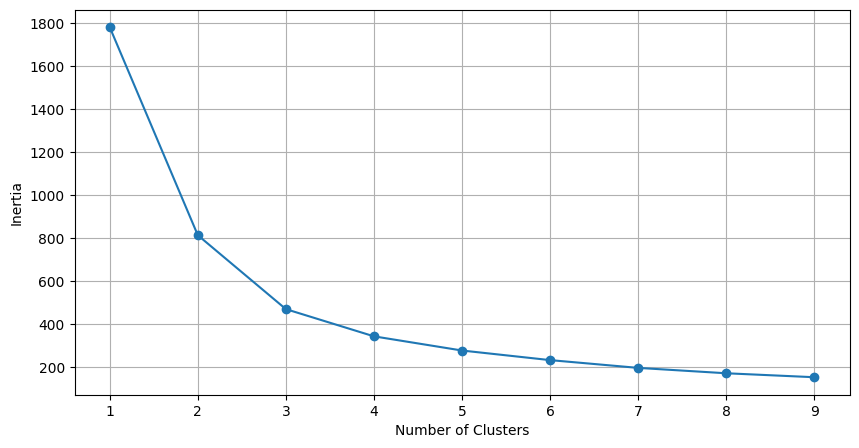

In [ ]:
optimise_k_means(df[['Column %_T', 'Index_T']],10) # Now we call the function created above on the data columns selected.

In the plot above, we can see that the sum of the squared distances to the nearest cluster center descreases as we increase the number of clusters. We can see a significant change in inertia and slope from 2 clusters onward. In most instances we will be looking for 3-4 clusters

In [ ]:
"""
There is a lot going on in this little snipet of code. Initializes the K-Means clustering algorithm to group data into
the number of selected clusters (n_clusters=3), running the algorithm 100 times with different initial centroids (n_init=100) to find the best clustering solution.
This helps reduce variability in results by selecting the most optimal centroid initialization.

"""
kmeans = KMeans(n_clusters=3, n_init=500) # update n_clusters=x with the number of clusters from the elbow plot
kmeans.fit(df[['Column %_T', 'Index_T']]) # applies the clustering to the data set

df['kmeans_3'] = kmeans.labels_ # writes the clusters to the dataframe

df # shows the dataframe below with the kmeans_3 column added

,Metric,Column %,Index,Column %_T,Index_T,kmeans_3
0,Any video: Any device (Activities in Last Week...,0.913,104,10.000000,4.422535,1
1,Own a product / service (Ownership vs Access),0.758,103,8.446548,4.380282,1
2,"Watching videos, TV shows or movies (Reasons f...",0.581,104,6.672606,4.422535,1
3,Finding information (Reasons for Using Internet),0.900,121,9.869710,5.140845,1
4,Music (Personal Interests),0.693,110,7.795100,4.676056,1
...,...,...,...,...,...,...
242,Traditionalists (All Personas),0.058,126,1.430958,5.352113,0
243,Other home/lifestyle interests (Personal Inter...,0.034,63,1.190423,2.690141,0
244,Career Focused Parents (All Personas),0.015,58,1.000000,2.478873,0
245,Other science/tech/nature interests (Personal ...,0.048,46,1.330735,1.971831,0


# Plotting the data with Matplotlib

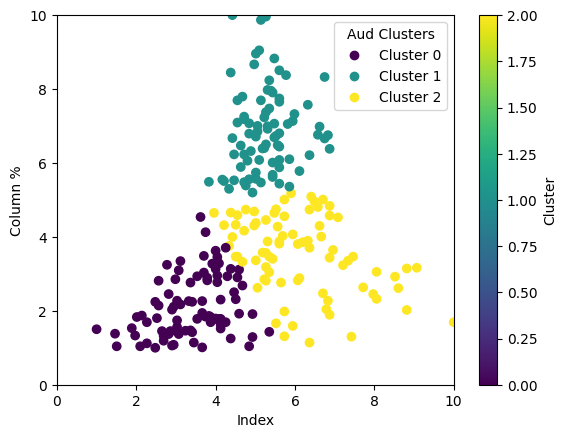

In [ ]:
"""
Creates a scatter plot where the x-axis represents 'Index_T', the y-axis represents 'Column %_T',
and the points are colored by their assigned K-Means cluster (kmeans_3) using the 'viridis' colormap.
If you are using different data columns - update them in the x=df and y=df [ ]

"""
scatter = plt.scatter(x=df['Index_T'], y=df['Column %_T'], c=df['kmeans_3'], cmap='viridis')

# Add axis labels
plt.xlabel('Index')
plt.ylabel('Column %')

# Add color legend
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Create a manual legend with cluster numbers
unique_clusters = np.unique(df['kmeans_3'])
legend_labels = [f'Cluster {i}' for i in unique_clusters]

# Add a legend mapping colors to cluster numbers
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Aud Clusters", loc='upper right')

# Set axis limits
plt.xlim(0,10)
plt.ylim(0,10)

# Show plot
plt.show()

In the above chart, you should see your different data points (features) plotted into different colored clusters associated with unique groups of your audience.

In [ ]:
"""
Let's check to see what would happen at differnt cluster levels. This loop runs the algorithm at different values of k.
The results are stored in new DataFrame columns (KMeans_1, KMeans_2, etc.), allowing comparison of different cluster solutions.
"""

for k in range(1,5):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['Column %_T', 'Index_T']])
    df[f'KMeans_{k}'] = kmeans.labels_

df #prints the frame below. You should now see KMeans_1 ... 2...etc.

,Metric,Column %,Index,Column %_T,Index_T,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4
0,Any video: Any device (Activities in Last Week...,0.913,104,10.000000,4.422535,1,0,1,1,3
1,Own a product / service (Ownership vs Access),0.758,103,8.446548,4.380282,1,0,1,1,3
2,"Watching videos, TV shows or movies (Reasons f...",0.581,104,6.672606,4.422535,1,0,1,1,3
3,Finding information (Reasons for Using Internet),0.900,121,9.869710,5.140845,1,0,1,1,3
4,Music (Personal Interests),0.693,110,7.795100,4.676056,1,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...
242,Traditionalists (All Personas),0.058,126,1.430958,5.352113,0,0,0,0,0
243,Other home/lifestyle interests (Personal Inter...,0.034,63,1.190423,2.690141,0,0,0,0,0
244,Career Focused Parents (All Personas),0.015,58,1.000000,2.478873,0,0,0,0,0
245,Other science/tech/nature interests (Personal ...,0.048,46,1.330735,1.971831,0,0,0,0,0


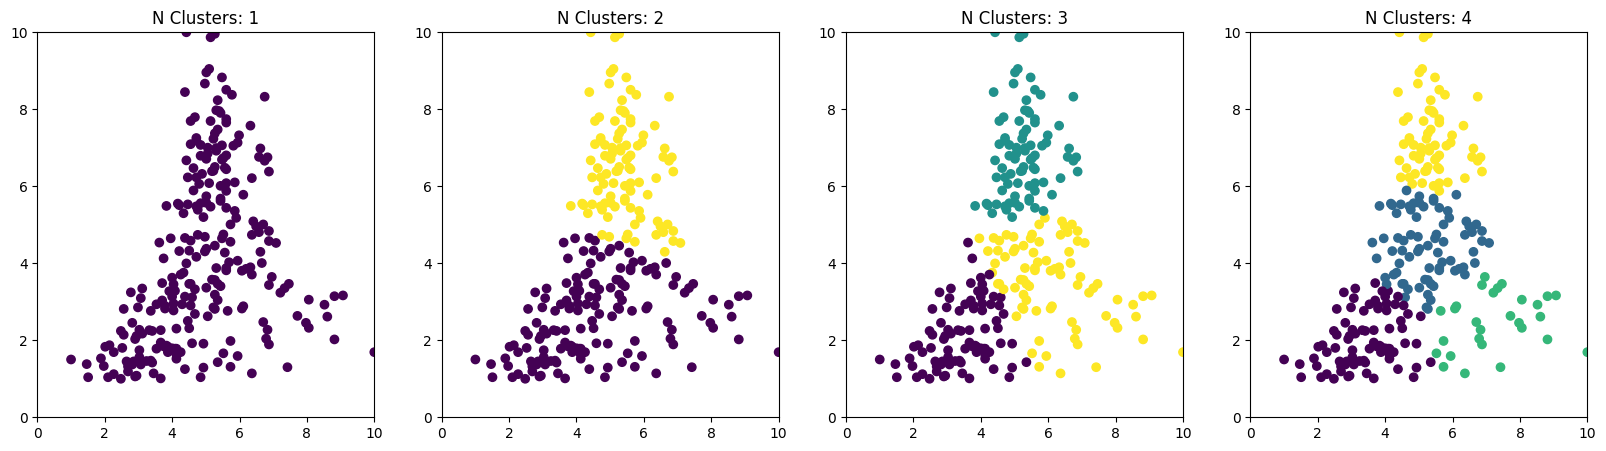

In [ ]:
# Identify the number of KMeans cluster columns dynamically
kmeans_columns = [col for col in df.columns if col.startswith('KMeans_')]
num_clusters = len(kmeans_columns)  # Get count of available clusters

# Adjust the number of subplots to match the number of clusters
fig, axs = plt.subplots(nrows=1, ncols=num_clusters, figsize=(num_clusters * 5, 5))

# Ensure axs is always an iterable (even if there's only one subplot)
if num_clusters == 1:
    axs = [axs]

# Loop through available clusters dynamically
for i, ax in enumerate(axs, start=1):
    col_name = f'KMeans_{i}'
    if col_name in df.columns:
        ax.scatter(x=df['Index_T'], y=df['Column %_T'], c=df[col_name])
        ax.set_ylim(0,10)
        ax.set_xlim(0,10)
        ax.set_title(f'N Clusters: {i}')
    else:
        print(f"Warning: {col_name} not found in DataFrame.")

plt.show()

The above should show several scatter plots at different cluster values. Check these clusters to see if it makes sense to increase or reduce the number of clusters used for analysis of your audience.

# Download Your File

In [ ]:
# Define the output filename
output_filename = 'Jeremys Audience Cluster 55+.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_filename, index=False)

# Download the file
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>